# **[CDJ] Matplotlib Workbook**

This notebook is largely adapted from the [Python for Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). Some other information draws from Medium, FA 23 INFO 2950 course, official documentations and Geeks4Geeks.

# Intro to Matplotlib

Matplotlib is a multiplatform data visualization library built on NumPy arrays.

## Importing Matplotlib

Just as we use the `np` shorthand for NumPy and the `pd` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The `plt` interface is what we will use most often.

Some other libraries we need:

In [2]:
import numpy as np
import pandas as pd

## Setting Styles

We will use the `plt.style` directive to choose appropriate aesthetic styles for our figures.
Here we will use the `default` style. Note that if you just want to use the default, ou do not need to write this line - I just want to show you how you can change if you want.

In [3]:
plt.style.use('default')

For more information on stylesheets, see the [documentation](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) on this.

##  How to Display Your Plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it;

### Plotting from a Script

If you are using Matplotlib from within a python script (not in a Jupyter Notebook), the function `plt.show` is needed to see any plot you make.

### Plotting from a Jupyter Notebook

Plotting interactively within a Jupyter notebook (like here) can be done with the `%matplotlib` command.
You also have the option of embedding graphics directly in the notebook, with two possible options:

- `%matplotlib inline` will lead to *static* images of your plot embedded in the notebook.
- `%matplotlib notebook` will lead to *interactive* plots embedded within the notebook.

In [4]:
%matplotlib inline

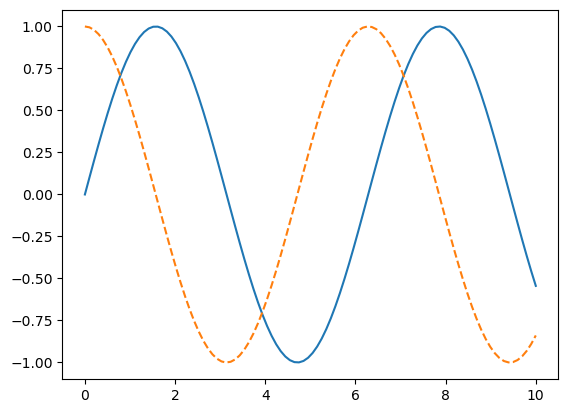

In [5]:
x = np.linspace(0, 10, 100) # This creates an array that have 1000 elements that is evenly spaced between 0 and 10.

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the `savefig` command.
For example, to save the previous figure as a PNG file, we can run this:

In [6]:
fig.savefig('my_figure.png')

We now have a file called *my_figure.png* in the current working directory.

In `savefig`, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [7]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

### Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. I'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

Matplotlib was originally conceived as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the `pyplot` (`plt`) interface.
For example, the following code will probably look quite familiar to MATLAB users (the following figure shows the result):

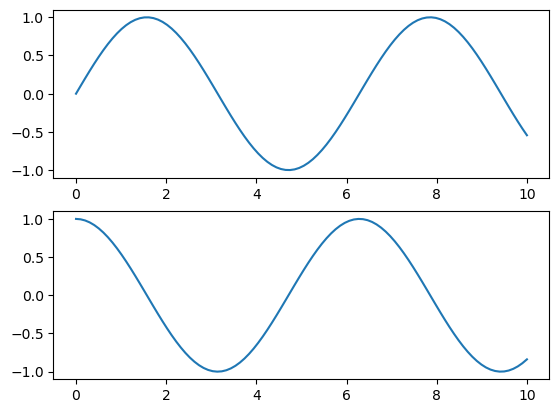

In [8]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to recognize that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all `plt` commands are applied.
You can get a reference to these using the `plt.gcf` (get current figure) and `plt.gca` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit `Figure` and `Axes` objects.
To re-create the previous plot using this style of plotting, as shown in the following figure, you might do the following:

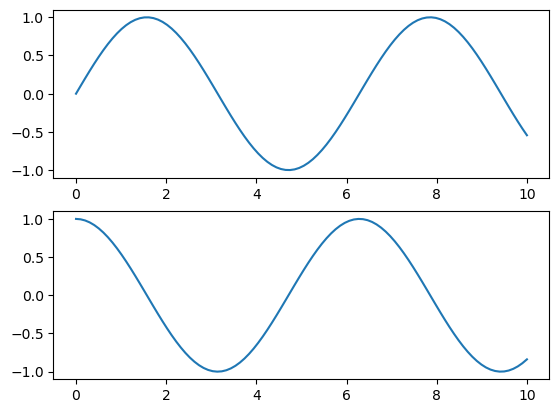

In [9]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For simpler plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.

In most cases, the difference is as small as switching `plt.plot` to `ax.plot`.

# Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.

For all Matplotlib plots, we start by creating a figure and axes.
In their simplest form, this can be done as follows (see the following figure):

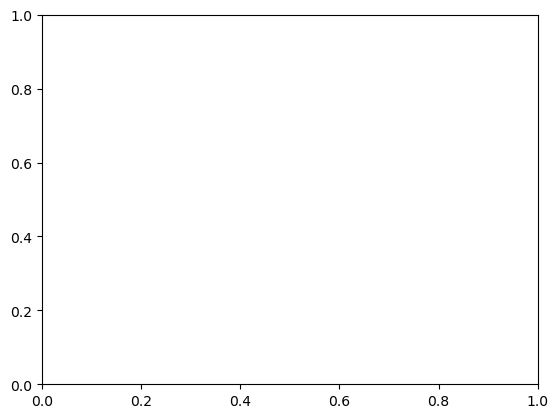

In [10]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class `plt.Figure`) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class `plt.Axes`) is what we see above: a bounding box with ticks, grids, and labels, which will eventually contain the plot elements that make up our visualization.
Throughout this part of the book, I'll commonly use the variable name `fig` to refer to a figure instance and `ax` to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the `ax.plot` method to plot some data. Let's start with a simple sinusoid, as shown in the following figure:

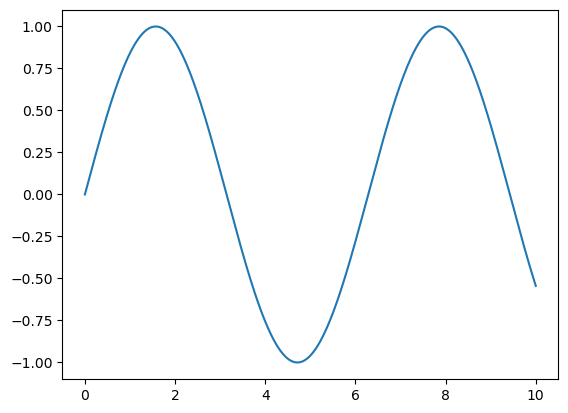

In [11]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

Note that the semicolon at the end of the last line is intentional: it suppresses the textual representation of the plot from the output.

Alternatively, we can use the PyLab interface and let the figure and axes be created for us in the background
(see [Two Interfaces for the Price of One](#Two-Interfaces-for-the-Price-of-One) for a discussion of these two interfaces); as the following figure shows, the result is the same:

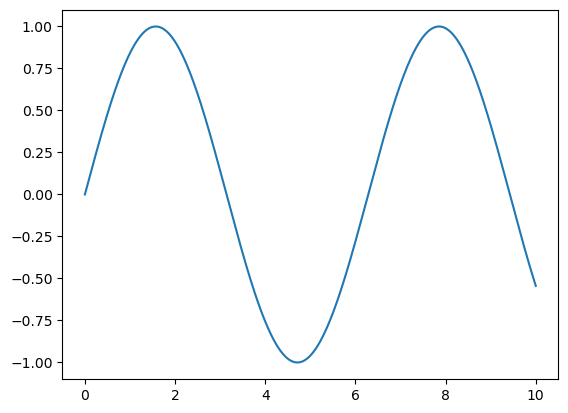

In [12]:
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines (see the following figure), we can simply call the `plot` function multiple times:

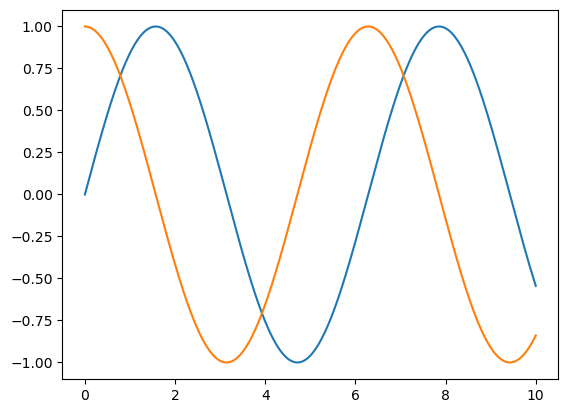

In [13]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

That's all there is to plotting simple functions in Matplotlib!
We'll now dive into some more details about how to control the appearance of the axes and lines.

## Adjusting the Plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles.
The `plt.plot` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the `color` keyword, which accepts a string argument representing virtually any imaginable color.
The color can be specified in a variety of ways; see the following figure for the output of the following examples:

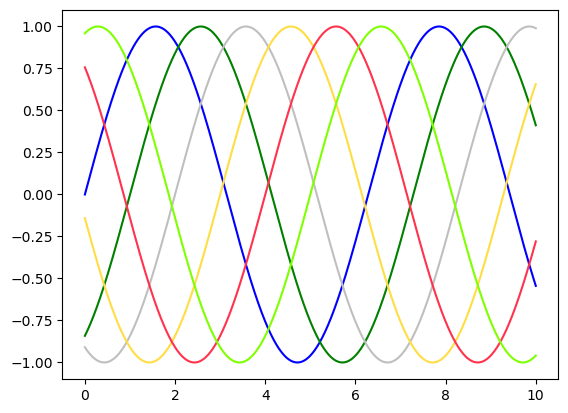

In [14]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # hex code (RRGGBB, 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the `linestyle` keyword (see the following figure):

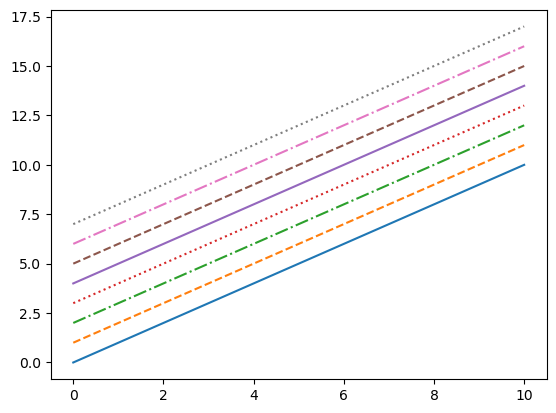

In [15]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

There are many other keyword arguments that can be used to fine-tune the appearance of the plot; 

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust the limits is to use the `plt.xlim` and `plt.ylim` functions (see the following figure):

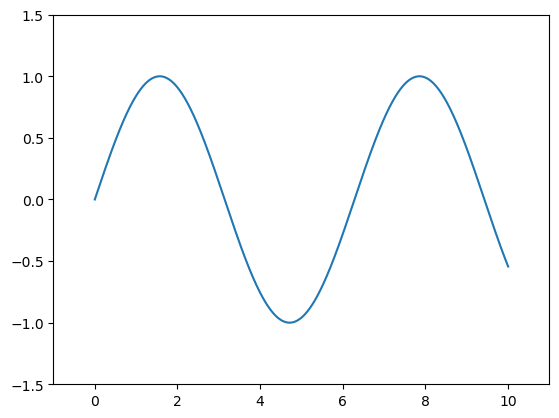

In [16]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments (see the following figure):

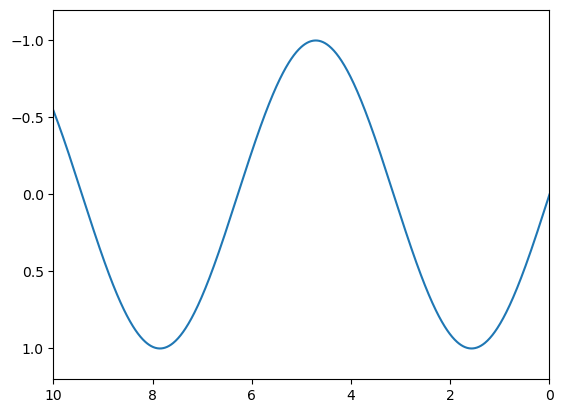

In [17]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

A useful related method is `plt.axis` (note here the potential confusion between *axes* with an *e*, and *axis* with an *i*), which allows more qualitative specifications of axis limits. For example, you can automatically tighten the bounds around the current content, as shown in the following figure:

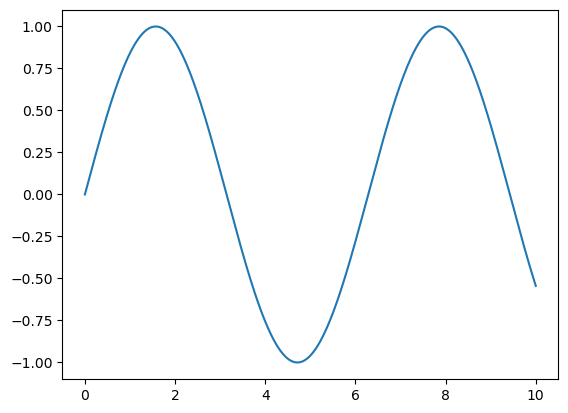

In [18]:
plt.plot(x, np.sin(x))
plt.axis('tight');

Or you can specify that you want an equal axis ratio, such that one unit in `x` is visually equivalent to one unit in `y`, as seen in the following figure:

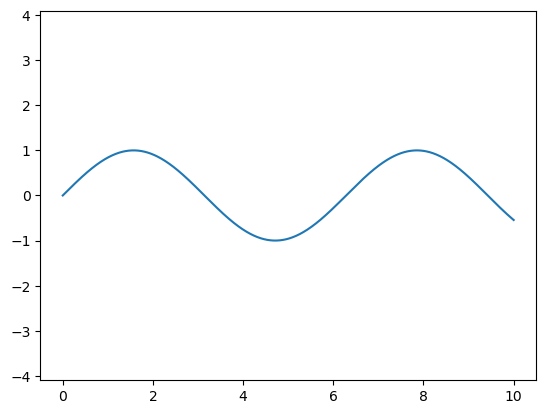

In [19]:
plt.plot(x, np.sin(x))
plt.axis('equal');

Other axis options include `'on'`, `'off'`, `'square'`, `'image'`, and more. For more information on these, refer to the `plt.axis` documentation.

## Labeling Plots

We'll briefly look at the labeling of plots: titles, axis labels, and simple legends.
Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them (see the following figure):

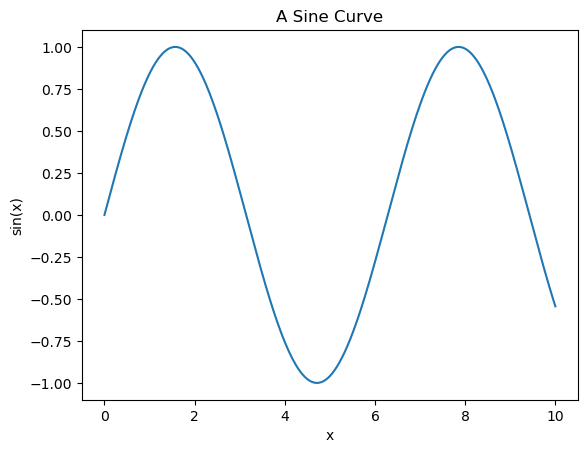

In [20]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the functions, described in the docstrings.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend; it is done via the (you guessed it) `plt.legend` method.
Though there are several valid ways of using this, I find it easiest to specify the label of each line using the `label` keyword of the `plot` function (see the following figure):

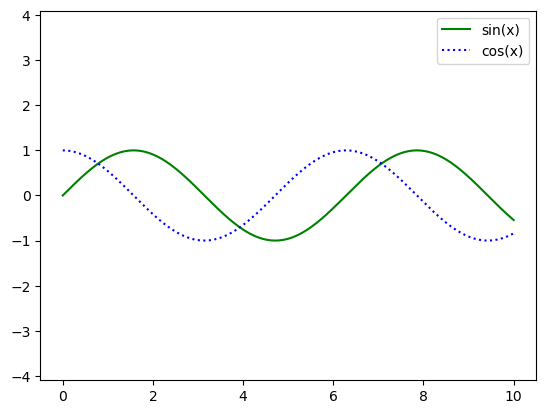

In [21]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

As you can see, the `plt.legend` function keeps track of the line style and color, and matches these with the correct label.
More information on specifying and formatting plot legends can be found in the `plt.legend` docstring; 

## Matplotlib Gotchas

While most `plt` functions translate directly to `ax` methods (`plt.plot` → `ax.plot`, `plt.legend` → `ax.legend`, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- `plt.xlabel`  → `ax.set_xlabel`
- `plt.ylabel` → `ax.set_ylabel`
- `plt.xlim`  → `ax.set_xlim`
- `plt.ylim` → `ax.set_ylim`
- `plt.title` → `ax.set_title`

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the `ax.set` method to set all these properties at once (see the following figure):

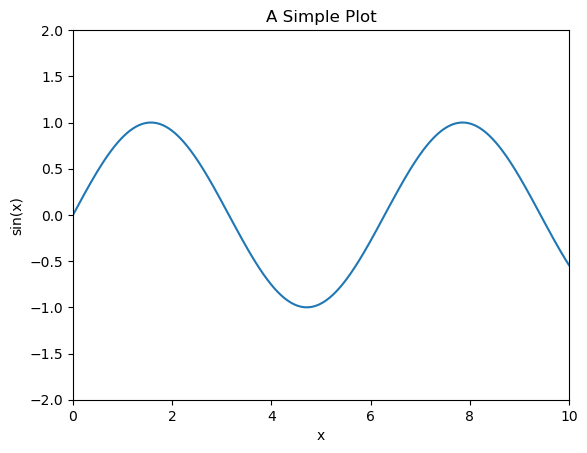

In [22]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.

## Scatter Plots with plt.plot

Previously, we looked at using `plt.plot`/`ax.plot` to produce line plots.
It turns out that this same function can produce scatter plots as well (see the following figure):

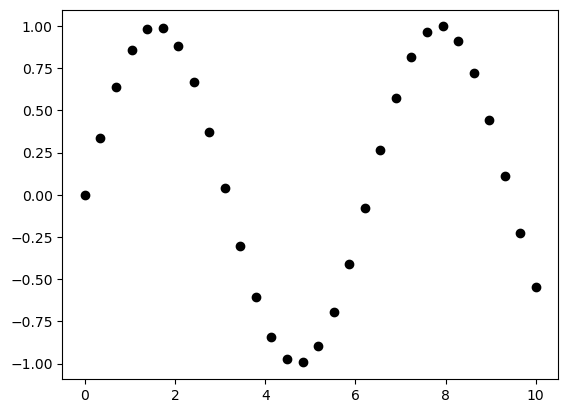

In [23]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as `'-'` or `'--'` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of `plt.plot`, or in Matplotlib's [online documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html). Most of the possibilities are fairly intuitive, and a number of the more common ones are demonstrated here (see the following figure):

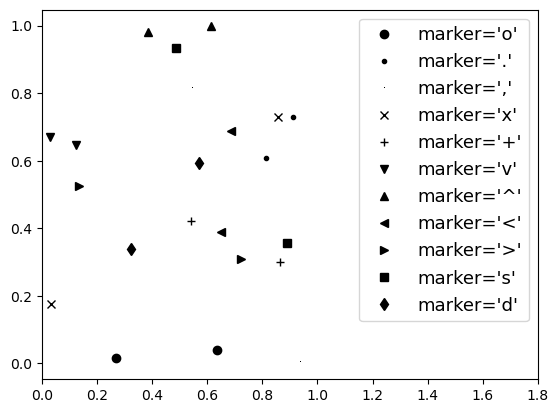

In [24]:
rng = np.random.default_rng(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.random(2), rng.random(2), marker, color='black',
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1, fontsize=13)
plt.xlim(0, 1.8);

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them (see the following figure):

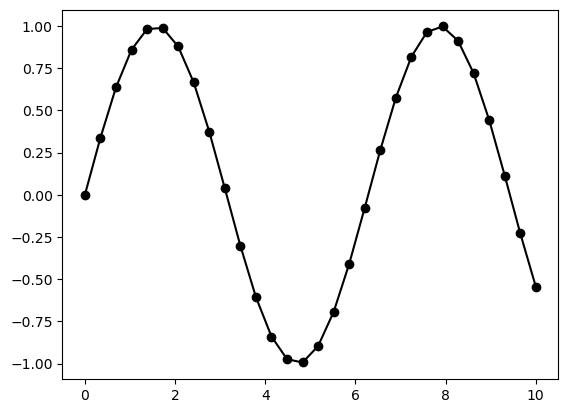

In [25]:
plt.plot(x, y, '-ok');

Additional keyword arguments to `plt.plot` specify a wide range of properties of the lines and markers, as you can see in the following figure:

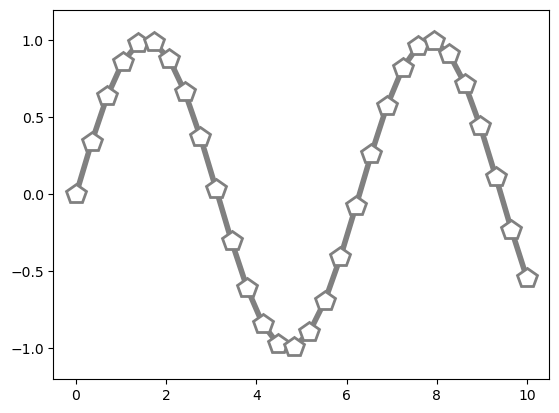

In [26]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

These kinds of options make `plt.plot` the primary workhorse for two-dimensional plots in Matplotlib.
For a full description of the options available, refer to the [`plt.plot` documentation](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html).

## Scatter Plots with plt.scatter

A second, more powerful method of creating scatter plots is the `plt.scatter` function, which can be used very similarly to the `plt.plot` function (see the following figure):

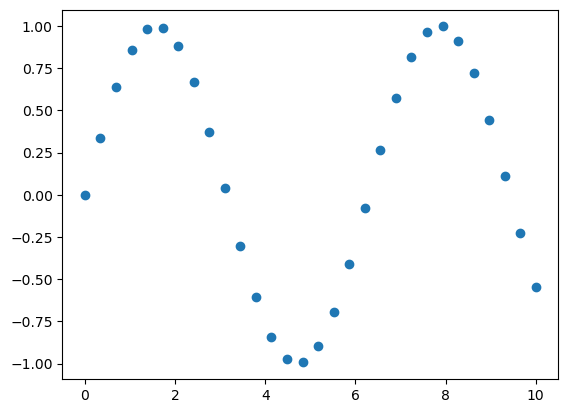

In [27]:
plt.scatter(x, y, marker='o');

The primary difference of `plt.scatter` from `plt.plot` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the `alpha` keyword to adjust the transparency level (see the following figure):

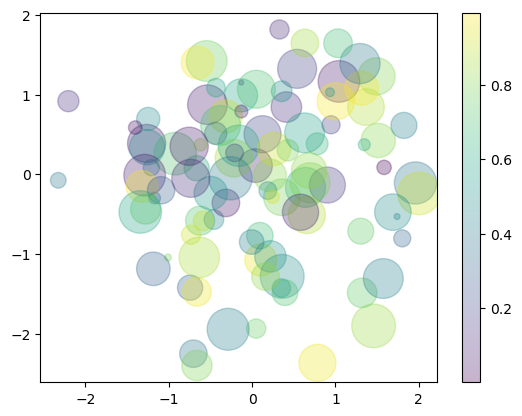

In [28]:
rng = np.random.default_rng(0)
x = rng.normal(size=100)
y = rng.normal(size=100)
colors = rng.random(100)
sizes = 1000 * rng.random(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)
plt.colorbar();  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown here by the `colorbar` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

## plot Versus scatter: A Note on Efficiency

Aside from the different features available in `plt.plot` and `plt.scatter`, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, `plt.plot` can be noticeably more efficient than `plt.scatter`.

# Histograms

A simple histogram can be a great first step in understanding a dataset.

In [29]:
rng = np.random.default_rng(1701)
data = rng.normal(size=1000)

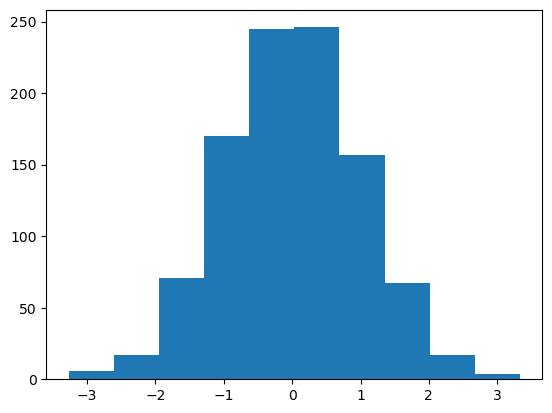

In [30]:
plt.hist(data);

The `hist` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram, shown in the following figure:

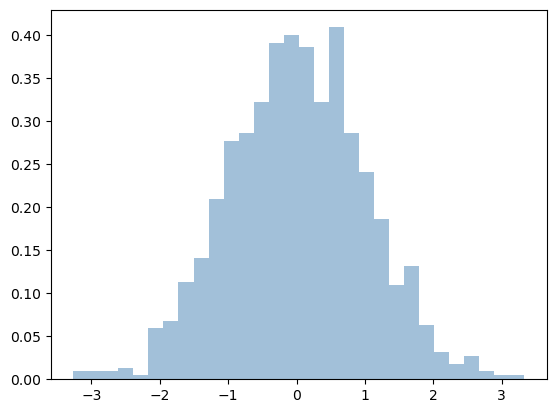

In [31]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

The `plt.hist` docstring has more information on other available customization options.
I find this combination of `histtype='stepfilled'` along with some transparency `alpha` to be helpful when comparing histograms of several distributions (see the following figure):

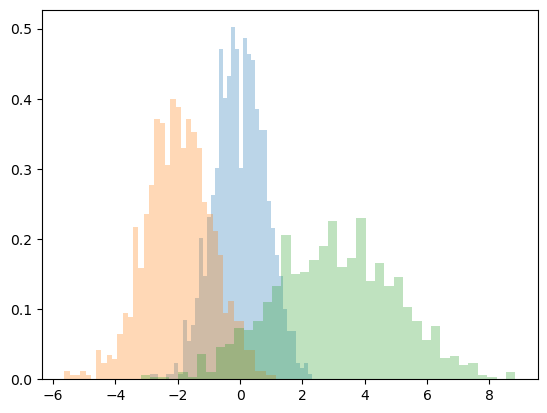

In [32]:
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number line into bins, we can also create histograms in two dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an `x` and `y` array drawn from a multivariate Gaussian distribution:

In [33]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = rng.multivariate_normal(mean, cov, 10000).T

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's `plt.hist2d` function (see the following figure):

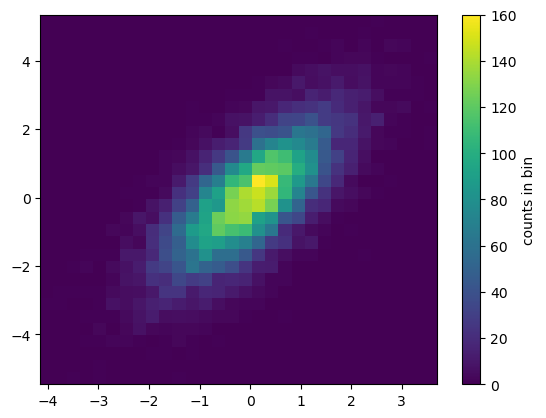

In [34]:
plt.hist2d(x, y, bins=30)
cb = plt.colorbar()
cb.set_label('counts in bin')

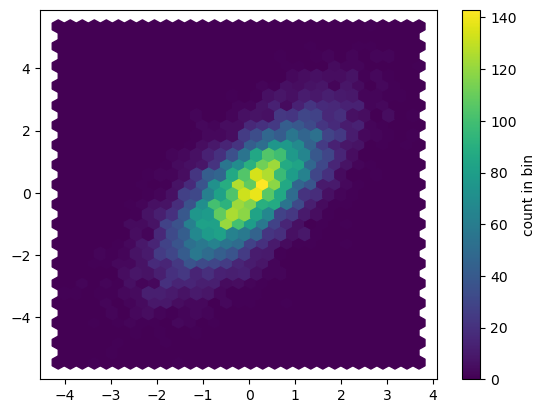

In [35]:
plt.hexbin(x, y, gridsize=30)
cb = plt.colorbar(label='count in bin')

`plt.hexbin` has a number of additional options, including the ability to specify weights for each point and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).

# Multiple Subplots

Sometimes it is helpful to compare different views of data side by side.
To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure.
These subplots might be insets, grids of plots, or other more complicated layouts.

## plt.axes: Subplots by Hand

The most basic method of creating an axes is to use the `plt.axes` function.
As we've seen previously, by default this creates a standard axes object that fills the entire figure.
`plt.axes` also takes an optional argument that is a list of four numbers in the figure coordinate system (`[left, bottom, width, height]`), which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure). The following figure shows the result:

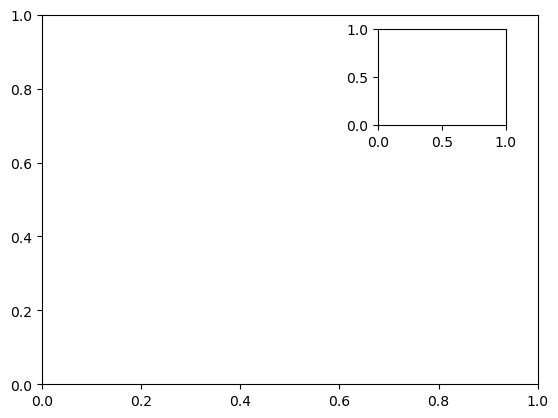

In [36]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent of this command within the object-oriented interface is `fig.add_axes`. Let's use this to create two vertically stacked axes, as seen in the following figure:

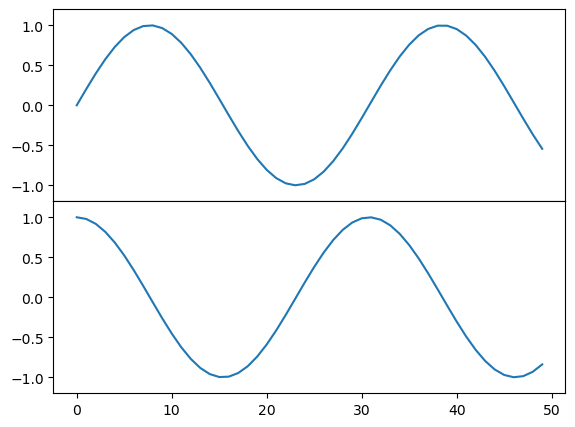

In [37]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

## plt.subplot: Simple Grids of Subplots

Aligned columns or rows of subplots are a common enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is `plt.subplot`, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right (see the following figure):

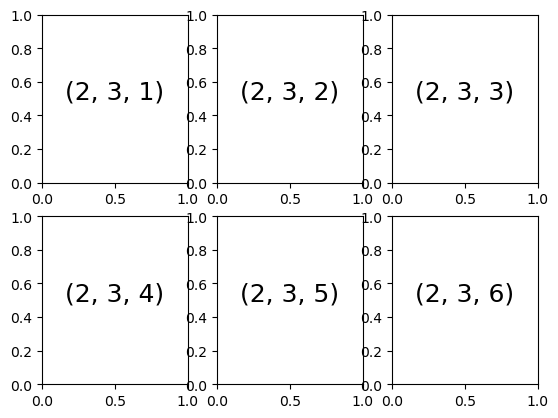

In [38]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

The command `plt.subplots_adjust` can be used to adjust the spacing between these plots.
The following code uses the equivalent object-oriented command, `fig.add_subplot`; the following figure shows the result:

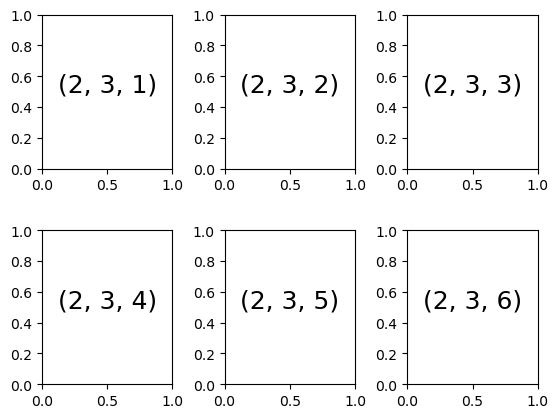

In [39]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

Here we've used the `hspace` and `wspace` arguments of `plt.subplots_adjust`, which specify the spacing along the height and width of the figure, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

## plt.subplots: The Whole Grid in One Go

The approach just described quickly becomes tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, `plt.subplots` is the easier tool to use (note the `s` at the end of `subplots`). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords `sharex` and `sharey`, which allow you to specify the relationships between different axes.

Let's create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale (see the following figure):

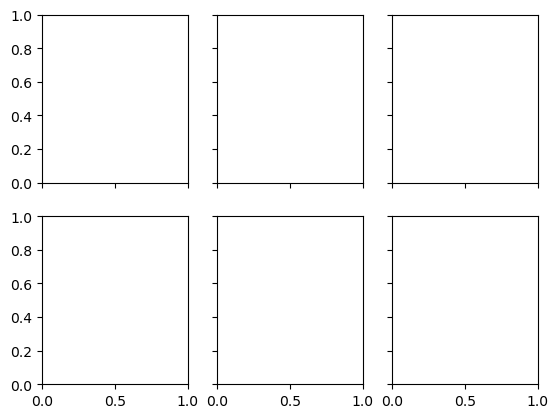

In [40]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

By specifying `sharex` and `sharey`, we've automatically removed inner labels on the grid to make the plot cleaner.
The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation (see the following figure):

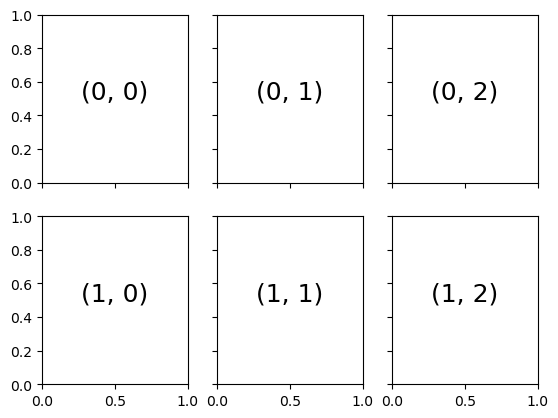

In [41]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

In comparison to `plt.subplot`, `plt.subplots` is more consistent with Python's conventional zero-based indexing, whereas `plt.subplot` uses MATLAB-style one-based indexing.